In [1]:
%matplotlib inline

import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

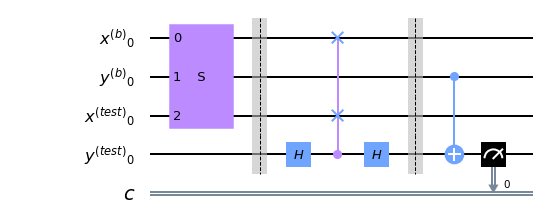

In [3]:
x_train = QuantumRegister(1, 'x^{(b)}')
x_test = QuantumRegister(1, 'x^{(test)}')
y_train = QuantumRegister(1, 'y^{(b)}')
y_test = QuantumRegister(1, 'y^{(test)}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(x_train, y_train, x_test, y_test, c)

S = Gate(name='  S  ', num_qubits=3, params=[])
qc.append(S, [x_train, y_train, x_test])
qc.barrier()
qc.h(y_test)
qc.cswap(y_test, x_train, x_test)
qc.h(y_test)
qc.barrier()
qc.cx(y_train, y_test)
qc.measure(y_test, c)

#qc = cos_classifier(x_tr, x_ts, y_tr)
qc.draw(output='mpl', scale=.6, 
        idle_wires =False, with_layout=False, 
        interactive=True, justify='right', initial_state =True, 
        filename='output/cosine_circuit.png')

In [4]:
d = 2
n_obs = 4
control = QuantumRegister(d, 'd')
data = QuantumRegister(n_obs, 'x')
labels = QuantumRegister(n_obs, 'y')
data_test = QuantumRegister(1, 'x^{test}')
label_test = QuantumRegister(1, 'y^{test}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(control, data, labels, data_test, label_test, c)

# for index in range(n_obs):
#     qc.initialize(X_data[index], [data[index]])
#     qc.initialize(Y_data[index], [labels[index]])

S = Gate(name='   S   ', num_qubits=8, params=[])
qc.append(S, [data[0], data[1], data[2], data[3],
              labels[0], labels[1], labels[2], labels[3]])


# for i in range(d):
#     qc.h(control[i])

W = Gate(name='   W   ', num_qubits=2, params=[])
qc.append(W, [control[0], control[1]])


U1 = [0, 2]  # np.random.choice(range(4), 2, replace=False)
U2 = [1, 3]  # np.random.choice(range(4), 2, replace=False)
U4 = [2,3]  # np.random.choice(range(4), 2, replace=False)

qc.barrier()

# U1
qc.cswap(control[0], data[int(U1[0])], data[int(U1[1])])
qc.cswap(control[0], labels[int(U1[0])], labels[int(U1[1])])

qc.x(control[0])

# U2
qc.cswap(control[0], data[int(U2[0])], data[int(U2[1])])
qc.cswap(control[0], labels[int(U2[0])], labels[int(U2[1])])

qc.barrier()

# U3
# qc.cswap(control[1], data[int(U3[0])], data[int(U3[1])])
# qc.cswap(control[1], labels[int(U3[0])], labels[int(U3[1])])

qc.x(control[1])

# U4
qc.cswap(control[1], data[int(U4[0])], data[int(U4[1])])
qc.cswap(control[1], labels[int(U4[0])], labels[int(U4[1])])

qc.barrier()
#qc.initialize(x_test, [data_test[0]])
S_test = Gate(name='$S_{test}$', num_qubits=2, params=[])
qc.append(S_test, [data_test, label_test])

qc.barrier()

# F
ix_cls = 3
# qc.h(labels[ix_cls])
# qc.cswap(labels[ix_cls], data[ix_cls], test[0])
# qc.h(labels[ix_cls])
# qc.measure(labels[ix_cls], c)
qc.h(label_test[0])
qc.cswap(label_test[0], data[ix_cls], data_test[0])
qc.h(label_test[0])
qc.cx(labels[ix_cls], label_test[0])
qc.measure(label_test[0], c)


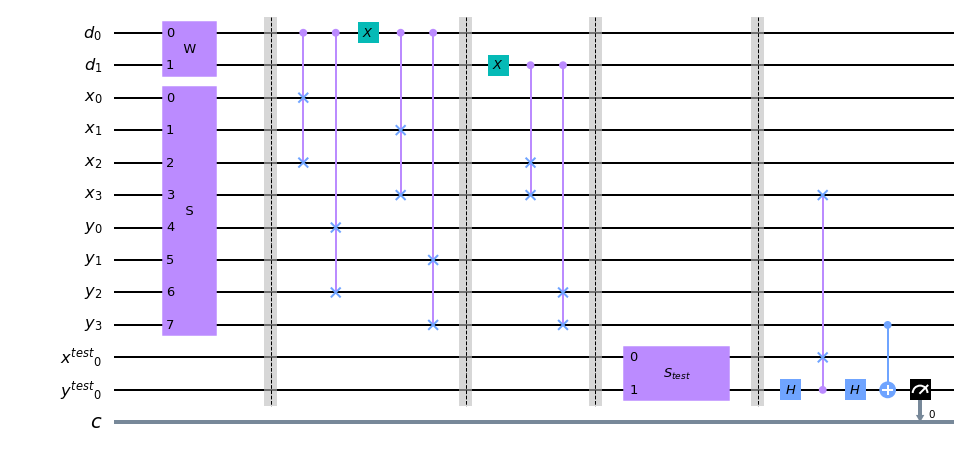

In [6]:
#qc = ensemble_fixed_U(X_data, Y_data, x_test)
qc.draw(output='mpl', scale=.5,filename='output/ensemble_circuit.png')